<a href="https://colab.research.google.com/github/Kremmydasalexandros/datastories_for_emme/blob/main/%CE%93%CE%A5%CE%9D%CE%91%CE%99%CE%9A%CE%9F%CE%9A%CE%A4%CE%9F%CE%9D%CE%99%CE%91_7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd

In [3]:
emolex_csv_path = "https://raw.githubusercontent.com/datajour-gr/DataJournalism/main/Bachelor%20Lessons%202023/Lesson%2010/NRC_GREEK_Translated_6_2020.csv"
emolex_df = pd.read_csv(emolex_csv_path)
emolex_df.tail(1)

,word,Positive,Negative,Anger,Anticipation,Disgust,Fear,Joy,Sadness,Surprise,Trust
13170,ζουμ,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
emolex_df = emolex_df.drop_duplicates(subset=['word'])
emolex_df = emolex_df.dropna()
emolex_df.reset_index(inplace = True, drop=True)
emolex_df.tail(1)

,word,Positive,Negative,Anger,Anticipation,Disgust,Fear,Joy,Sadness,Surprise,Trust
13160,ζουμ,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [22]:
positive_words_df = emolex_df[emolex_df.Positive == 1][['word']]


In [23]:
positive_words_df = positive_words_df.rename(columns={"word":"positive_words"}).reset_index(drop=True)


In [24]:

negative_words_df = emolex_df[emolex_df.Negative == 1][['word']]


In [25]:

negative_words_df = negative_words_df.rename(columns={"word":"negative_words"}).reset_index(drop=True)


In [26]:

angry_words_df = emolex_df[emolex_df.Anger == 1][['word']]


In [27]:

angry_words_df = angry_words_df.rename(columns={"word":"angry_words"}).reset_index(drop=True)



In [28]:

anticipation_words_df = emolex_df[emolex_df.Anticipation == 1][['word']]


In [29]:

anticipation_words_df = anticipation_words_df.rename(columns={"word":"anticipation_words"}).reset_index(drop=True)



In [30]:

disgust_words_df = emolex_df[emolex_df.Disgust == 1][['word']]


In [31]:

disgust_words_df = disgust_words_df.rename(columns={"word":"disgust_words"}).reset_index(drop=True)



In [32]:

fear_words_df = emolex_df[emolex_df.Fear == 1][['word']]


In [33]:

fear_words_df = fear_words_df.rename(columns={"word":"fear_words"}).reset_index(drop=True)



In [34]:

joy_words_df = emolex_df[emolex_df.Joy == 1][['word']]


In [35]:


joy_words_df = joy_words_df.rename(columns={"word":"joy_words"}).reset_index(drop=True)

In [37]:
dfList = [emolex_df[["word"]],
          positive_words_df,
          negative_words_df,
          angry_words_df,
          anticipation_words_df,
          disgust_words_df,
          fear_words_df,
          joy_words_df,]

In [38]:
emotions_df = pd.concat(dfList,axis=1)

In [39]:
emotions_df.tail(1)

,word,positive_words,negative_words,angry_words,anticipation_words,disgust_words,fear_words,joy_words
13160,ζουμ,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [41]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [42]:
emotions_df.to_csv("/content/gdrive/MyDrive/sentimentanalysis1.csv", index=False)

In [43]:
!python -m spacy download el_core_news_sm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.6/12.6 MB 51.0 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('el_core_news_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [44]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [45]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from datetime import datetime
import spacy

In [46]:
nlp = spacy.load('el_core_news_sm')

In [48]:
emotion_words_df = pd.read_csv("/content/gdrive/MyDrive/sentimentanalysis1.csv")
emotion_words_df.tail(1)

,word,positive_words,negative_words,angry_words,anticipation_words,disgust_words,fear_words,joy_words
13160,ζουμ,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [57]:
df = pd.read_csv("/content/gdrive/MyDrive/gunaikoktonia1.csv")
df.tail(1)

,title,text
1435,Ιταλία: Παράνομος αλλοδαπός βίασε και σκότωσε ...,Οι Αρχές της Ιταλίας ερευνούν την άγρια δολοφο...


In [58]:
vec = CountVectorizer(analyzer = 'word', vocabulary = emotion_words_df.word,
                      lowercase=False,
                      strip_accents = 'unicode',
                      stop_words= list(nlp.Defaults.stop_words),
                      ngram_range=(1, 2))

In [59]:
matrix = vec.fit_transform(efsyn_df['text'])
vocab = vec.get_feature_names_out()
wordcount_df = pd.DataFrame(matrix.toarray(), columns=vocab)
wordcount_df.head(1)

/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:409: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['αδιακοπα', 'ακομα', 'ακομη', 'ακριβως', 'αλλα', 'αλλαχου', 'αλλες', 'αλλη', 'αλλην', 'αλλης', 'αλλιως', 'αλλιωτικα', 'αλλο', 'αλλοι', 'αλλοιως', 'αλλοιωτικα', 'αλλον', 'αλλος', 'αλλοτε', 'αλλου', 'αλλους', 'αλλων', 'αμα', 'αμεσα', 'αμεσως', 'ανα', 'αναμεσα', 'αναμεταξυ', 'ανευ', 'αντι', 'αντιπερα', 'αντις', 'ανω', 'ανωτερω', 'αξαφνα', 'απεναντι', 'απο', 'αποψε', 'αρα', 'αραγε', 'αρκετα', 'αρκετες', 'αρχικα', 'αυριο', 'αυτα', 'αυτες', 'αυτη', 'αυτην', 'αυτης', 'αυτο', 'αυτοι', 'αυτον', 'αυτος', 'αυτου', 'αυτους', 'αυτων', 'αφοτου', 'αφου', 'βεβαια', 'βεβαιοτατα', 'γιατι', 'γρηγορα', 'γυρω', 'δεινα', 'δεξια', 'δηθεν', 'δηλαδη', 'διαρκως', 'δικα', 'δικο', 'δικοι', 'δικος', 'δικου', 'δικους', 'διολου', 'διπλα', 'διχως', 'εαν', 'εαυτο', 'εαυτον', 'εαυτου', 'εαυτους', 'εαυτων', 'εγιναν', 'εγινε',

,αφεση,ενορκη βεβαιωση,εχοντας,εχω,οριο,ορμος,υδρα,αγια τραπεζα,αμην,απατσι,...,κλητηριο ενταλμα,κατειργασμενος,μαγια,κιτρινο,κιτρινιζω,ουρλιασμα,κροκος αυγου,νεοτερος,ζεφυρος,ζουμ
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [60]:
emo_df = df.copy()

In [63]:
df['positivity'] = wordcount_df[emotion_words_df.positive_words.dropna()].sum(axis=1)
df['negativity'] = wordcount_df[emotion_words_df.negative_words.dropna()].sum(axis=1)
df['anger'] = wordcount_df[emotion_words_df.angry_words.dropna()].sum(axis=1)
df['anticipation'] = wordcount_df[emotion_words_df.anticipation_words.dropna()].sum(axis=1)
df['disgust'] = wordcount_df[emotion_words_df.disgust_words.dropna()].sum(axis=1)
df['fear'] = wordcount_df[emotion_words_df.fear_words.dropna()].sum(axis=1)
df['joy'] = wordcount_df[emotion_words_df.joy_words.dropna()].sum(axis=1)


In [64]:
emo_df.tail(1)

,title,text
1435,Ιταλία: Παράνομος αλλοδαπός βίασε και σκότωσε ...,Οι Αρχές της Ιταλίας ερευνούν την άγρια δολοφο...


In [68]:
df['joy']

0       39
1        6
2        2
3        1
4        7
        ..
1431     4
1432     3
1433     7
1434     4
1435     3
Name: joy, Length: 1436, dtype: int64

In [69]:
wordcount_df.shape

(1436, 13161)

In [70]:
emolex_df.head()

,word,Positive,Negative,Anger,Anticipation,Disgust,Fear,Joy,Sadness,Surprise,Trust
0,αφεση,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,ενορκη βεβαιωση,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,εχοντας,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,εχω,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,οριο,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [74]:
emolex_df[emolex_df.Anger == 1].tail()

,word,Positive,Negative,Anger,Anticipation,Disgust,Fear,Joy,Sadness,Surprise,Trust
13094,διεξοδος,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
13096,ζωυφια,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
13100,θυματοποιω,0.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0
13128,αποτυχημενος,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
13156,ουρλιασμα,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [78]:

positive_words = emolex_df[emolex_df.Positive == 1]['word']

negative_words = emolex_df[emolex_df.Negative == 1]['word']


angry_words = emolex_df[emolex_df.Anger == 1]['word']


anticipation_words = emolex_df[emolex_df.Anticipation == 1]['word']


disgust_words = emolex_df[emolex_df.Disgust == 1]['word']


fear_words = emolex_df[emolex_df.Fear == 1]['word']


joy_words = emolex_df[emolex_df.Joy == 1]['word']


sadness_words = emolex_df[emolex_df.Sadness == 1]['word']


surprise_words = emolex_df[emolex_df.Surprise == 1]['word']


trust_words = emolex_df[emolex_df.Trust == 1]['word']

In [79]:
trust_words

8                        αμην
15             γαμηλιο ταξιδι
24       διευθυντρια σχολειου
38                 επικοινωνω
45                   εκκλησια
                 ...         
13039                  αληθης
13075             αναμφιβολως
13079             ανυπερβατος
13113            αναθηματικος
13114       αποδειξη πληρωμης
Name: word, Length: 1259, dtype: object

In [80]:
wordcount_df.tail(1)

,αφεση,ενορκη βεβαιωση,εχοντας,εχω,οριο,ορμος,υδρα,αγια τραπεζα,αμην,απατσι,...,κλητηριο ενταλμα,κατειργασμενος,μαγια,κιτρινο,κιτρινιζω,ουρλιασμα,κροκος αυγου,νεοτερος,ζεφυρος,ζουμ
1435,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [81]:
wordcount_df[trust_words].tail(1)

,αμην,γαμηλιο ταξιδι,διευθυντρια σχολειου,επικοινωνω,εκκλησια,εν τω μεταξυ,ευαγγελιο,κυριε,λιστα ελεγχου,λυρικη σκηνη,...,ηλιακο ωρολογιο,συνεργιστικος,διπλο ποδηλατο,ισαξιος,ανακωχη,αληθης,αναμφιβολως,ανυπερβατος,αναθηματικος,αποδειξη πληρωμης
1435,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [82]:
wordcount_df[trust_words].sum(axis=1)

0       67
1        9
2       20
3        1
4       34
        ..
1431     3
1432     4
1433     9
1434     7
1435     8
Length: 1436, dtype: int64

In [83]:

df.head(3)

,title,text,positivity,negativity,anger,anticipation,disgust,fear,joy
0,Ομιλία Κουτσούμπα στη συναυλία-αφιέρωμα στο πο...,"Στη Θεσσαλονίκη, στο Θέατρο Γης, στην μεγάλη σ...",106,100,82,49,45,62,39
1,Τα διδάγματα και η προτροπή μου,Ι. Παλαμίδης*\nΚύριε διευθυντά\nΔιαβάζοντας όπ...,17,7,0,5,0,2,6
2,Ποινή φυλάκισης 12 μηνών αλλά εξαγοράσιμη στον...,Με ποινή φυλάκισης 12 μηνών εξαγοράσιμη προς 1...,23,35,28,10,15,33,2


In [84]:
df['anger'] = wordcount_df[angry_words].sum(axis=1)

df['positive'] = wordcount_df[positive_words].sum(axis=1)
df['joy'] = wordcount_df[joy_words].sum(axis=1)
df['disgust'] = wordcount_df[disgust_words].sum(axis=1)

df['surprise'] = wordcount_df[surprise_words].sum(axis=1)

df['trust'] = wordcount_df[trust_words].sum(axis=1)
df['anticipation'] = wordcount_df[anticipation_words].sum(axis=1)

df['sadness'] = wordcount_df[sadness_words].sum(axis=1)

df['negative'] = wordcount_df[negative_words].sum(axis=1)

df['fear'] = wordcount_df[fear_words].sum(axis=1)

In [86]:
df

,title,text,positivity,negativity,anger,anticipation,disgust,fear,joy,positive,surprise,trust,sadness,negative
0,Ομιλία Κουτσούμπα στη συναυλία-αφιέρωμα στο πο...,"Στη Θεσσαλονίκη, στο Θέατρο Γης, στην μεγάλη σ...",106,100,82,49,45,62,39,106,28,67,45,100
1,Τα διδάγματα και η προτροπή μου,Ι. Παλαμίδης*\nΚύριε διευθυντά\nΔιαβάζοντας όπ...,17,7,0,5,0,2,6,17,3,9,0,7
2,Ποινή φυλάκισης 12 μηνών αλλά εξαγοράσιμη στον...,Με ποινή φυλάκισης 12 μηνών εξαγοράσιμη προς 1...,23,35,28,10,15,33,2,23,5,20,15,35
3,Το Προξενιό της Ιουλίας: Ο Προβιός στο χώμα κα...,Ο Γιωργίκης Προβιός είχε το τέλος που του άξιζ...,5,5,4,3,3,5,1,5,5,1,5,5
4,Εκλογές στο Ιράν: Θα αλλάξουν οι σχέσεις με τι...,Ο Μασούντ Πεζεσκιάν ελπίζει να κερδίσει ένα απ...,49,27,14,16,8,17,7,49,8,34,9,27
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1431,Τροιζήνα: Παιδί σκοτώθηκε στο φαράγγι Διαβολογ...,Το άτυχο\nαγόρι\nείχε πάει με γκρουπ τουριστών...,5,5,1,4,3,5,4,5,0,3,2,5
1432,Το Σάββατο 29 Ιουνίου το 40ήμερο μνημόσυνο της...,Τελούμε το\nΣάββατο 29 Ιουνίου 2024\nστον Ιερό...,5,0,0,2,0,0,3,5,0,4,1,0
1433,"Φωτεινή Ντεμίρη: «Είμαι κατά του γάμου, αν ήτα...",«Είμαι σε μία μεταβατική κατάσταση και θέλω να...,19,14,5,5,3,4,7,19,1,9,5,14
1434,Φυλακές Κορυδαλλού: Η ανακοίνωση του υπουργείο...,"Ανακοίνωση για την φονική συμπλοκή, με έναν νε...",10,20,11,14,3,17,4,10,7,7,15,20


In [105]:
df.joy.max()

ValueError: No axis named 5 for object type Series

<Axes: >

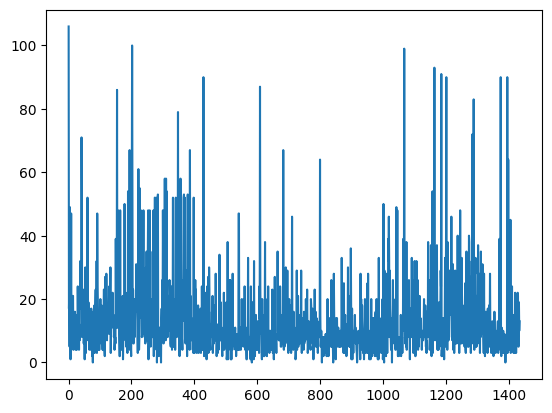

In [90]:
df['positive'].plot()

<Axes: >

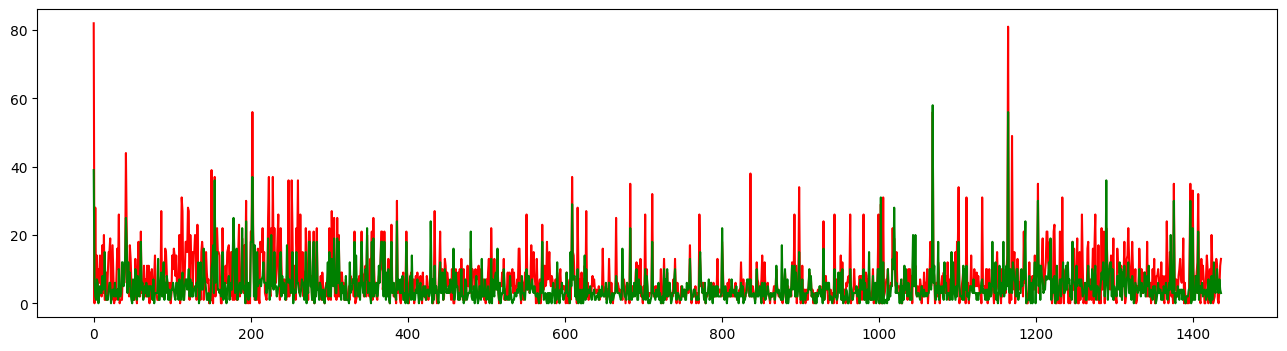

In [92]:
ax = df['anger'].plot(figsize=(16,4), color = 'red')
df['joy'].plot(figsize=(16,4), ax = ax, color = 'green')

<Axes: >

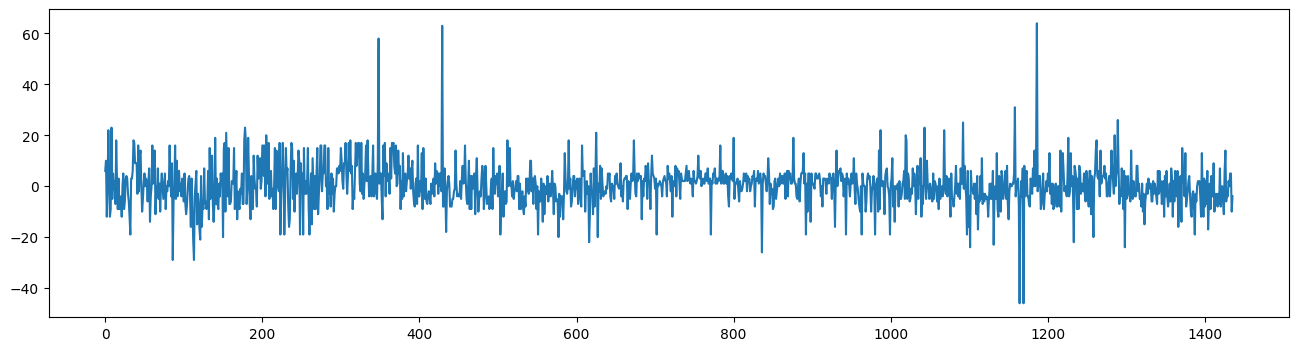

In [96]:
df['pos/neg'] = df['positive'] - df['negative']
df['pos/neg'].plot(figsize=(16,4))

In [126]:
sorted_df = df.sort_values(by='positivity', ascending=False)



In [127]:
sorted_df.head()

,title,text,positivity,negativity,anger,anticipation,disgust,fear,joy,positive,surprise,trust,sadness,negative,pos/neg
0,Ομιλία Κουτσούμπα στη συναυλία-αφιέρωμα στο πο...,"Στη Θεσσαλονίκη, στο Θέατρο Γης, στην μεγάλη σ...",106,100,82,49,45,62,39,106,28,67,45,100,6
202,Ρέιτσελ Κασκ: «Θέλω να γράψω όπως οι ζωγράφοι ...,Η Ρέιτσελ Κασκ φοράει γυαλιά ηλίου κι ένα φουλ...,100,96,56,41,34,47,37,100,37,60,50,96,4
1068,Οι καλύτερες ταινίες που παίζουν τώρα στα σινε...,Μια λίστα με τις ιδανικότερες προτάσεις για κι...,99,77,56,56,23,33,58,99,13,52,24,77,22
1164,Οι παιδοκτονίες που σόκαραν την Ελλάδα: Από τη...,Οι ιστορίες που έμειναν χαραγμένες στη μνήμη ό...,93,139,81,75,63,86,56,93,36,67,89,139,-46
1186,Οι 9 γυναίκες της ναυτιλίας που διαχειρίζονται...,Συνεχώς αυξάνονται οι γυναίκες της ελληνικής ν...,91,27,7,23,18,12,24,91,6,63,12,27,64


In [123]:
#positivity	negativity	anger	anticipation	disgust	fear	joy

In [132]:
sorted2_df = df.sort_values(by='negativity', ascending=False)



In [133]:
sorted2_df.head()

,title,text,positivity,negativity,anger,anticipation,disgust,fear,joy,positive,surprise,trust,sadness,negative,pos/neg
1164,Οι παιδοκτονίες που σόκαραν την Ελλάδα: Από τη...,Οι ιστορίες που έμειναν χαραγμένες στη μνήμη ό...,93,139,81,75,63,86,56,93,36,67,89,139,-46
0,Ομιλία Κουτσούμπα στη συναυλία-αφιέρωμα στο πο...,"Στη Θεσσαλονίκη, στο Θέατρο Γης, στην μεγάλη σ...",106,100,82,49,45,62,39,106,28,67,45,100,6
202,Ρέιτσελ Κασκ: «Θέλω να γράψω όπως οι ζωγράφοι ...,Η Ρέιτσελ Κασκ φοράει γυαλιά ηλίου κι ένα φουλ...,100,96,56,41,34,47,37,100,37,60,50,96,4
609,Σαντιάγο Ρονκαλιόλο: Μιλάει για το νέο του ιστ...,Το επάγγελμα του συγγραφέα είναι πολύ μοναχικό...,87,82,37,44,44,45,29,87,28,57,36,82,5
683,Grigori Rasputin: Ο βίος και η πολιτεία του δι...,"Grigori Rasputin, ο Ρώσος καλόγερος, θεραπευτή...",67,80,35,26,29,36,22,67,14,51,35,80,-13


In [134]:
sorted3_df = df.sort_values(by='anger', ascending=False)



In [135]:
sorted3_df.head()

,title,text,positivity,negativity,anger,anticipation,disgust,fear,joy,positive,surprise,trust,sadness,negative,pos/neg
0,Ομιλία Κουτσούμπα στη συναυλία-αφιέρωμα στο πο...,"Στη Θεσσαλονίκη, στο Θέατρο Γης, στην μεγάλη σ...",106,100,82,49,45,62,39,106,28,67,45,100,6
1164,Οι παιδοκτονίες που σόκαραν την Ελλάδα: Από τη...,Οι ιστορίες που έμειναν χαραγμένες στη μνήμη ό...,93,139,81,75,63,86,56,93,36,67,89,139,-46
202,Ρέιτσελ Κασκ: «Θέλω να γράψω όπως οι ζωγράφοι ...,Η Ρέιτσελ Κασκ φοράει γυαλιά ηλίου κι ένα φουλ...,100,96,56,41,34,47,37,100,37,60,50,96,4
1068,Οι καλύτερες ταινίες που παίζουν τώρα στα σινε...,Μια λίστα με τις ιδανικότερες προτάσεις για κι...,99,77,56,56,23,33,58,99,13,52,24,77,22
1169,Σοκάρουν οι μαρτυρίες κακοποιημένων γυναικών σ...,Μαρτυρία 1η\n:\n«\nΌταν για πρώτη φορά μου ασκ...,26,72,49,20,44,52,3,26,9,26,31,72,-46


In [136]:
sorted4_df = df.sort_values(by='disgust', ascending=False)


In [138]:
sorted4_df.head()

,title,text,positivity,negativity,anger,anticipation,disgust,fear,joy,positive,surprise,trust,sadness,negative,pos/neg
1164,Οι παιδοκτονίες που σόκαραν την Ελλάδα: Από τη...,Οι ιστορίες που έμειναν χαραγμένες στη μνήμη ό...,93,139,81,75,63,86,56,93,36,67,89,139,-46
0,Ομιλία Κουτσούμπα στη συναυλία-αφιέρωμα στο πο...,"Στη Θεσσαλονίκη, στο Θέατρο Γης, στην μεγάλη σ...",106,100,82,49,45,62,39,106,28,67,45,100,6
1169,Σοκάρουν οι μαρτυρίες κακοποιημένων γυναικών σ...,Μαρτυρία 1η\n:\n«\nΌταν για πρώτη φορά μου ασκ...,26,72,49,20,44,52,3,26,9,26,31,72,-46
609,Σαντιάγο Ρονκαλιόλο: Μιλάει για το νέο του ιστ...,Το επάγγελμα του συγγραφέα είναι πολύ μοναχικό...,87,82,37,44,44,45,29,87,28,57,36,82,5
41,Γιάννης Τράγκας- Μαρία Καρρά: Μάχη για την κλη...,"28 Ιουνίου, 2024\n21:00\nnewsautoteam\nΦέρεται...",71,74,44,48,39,46,25,71,27,70,38,74,-3


In [139]:
sorted5_df = df.sort_values(by='fear', ascending=False)


In [141]:
sorted5_df.head()

,title,text,positivity,negativity,anger,anticipation,disgust,fear,joy,positive,surprise,trust,sadness,negative,pos/neg
1164,Οι παιδοκτονίες που σόκαραν την Ελλάδα: Από τη...,Οι ιστορίες που έμειναν χαραγμένες στη μνήμη ό...,93,139,81,75,63,86,56,93,36,67,89,139,-46
0,Ομιλία Κουτσούμπα στη συναυλία-αφιέρωμα στο πο...,"Στη Θεσσαλονίκη, στο Θέατρο Γης, στην μεγάλη σ...",106,100,82,49,45,62,39,106,28,67,45,100,6
1396,Επιστολή θανούσης….,ΕΘΝΙΚΟ ΣΥΣΤΗΜΑ ΥΓΕΙΑΣ\nΕΠΙΣΤΟΛΗ ΘΑΝΟΥΣΗΣ\nΆλντ...,90,77,35,38,34,58,30,90,14,85,52,77,13
1375,ΕΘΝΙΚΟ ΣΥΣΤΗΜΑ ΥΓΕΙΑΣ ΕΠΙΣΤΟΛΗ ΘΑΝΟΥΣΗΣ,"KefaloniaNews\nOn\n27, June 2024\nΆλντα Μαρία ...",90,77,35,38,34,58,30,90,14,85,52,77,13
1202,Γαβριήλ Μανωλάτος: Επιστολή θανούσης για το Εθ...,Άλντα Μαρία Μανωλάτου\nΓεννήθηκα στην Πορτογαλ...,90,77,35,38,34,58,30,90,14,85,52,77,13


In [143]:
sorted6_df = df.sort_values(by='surprise', ascending=False)

In [144]:
sorted6_df.head()

,title,text,positivity,negativity,anger,anticipation,disgust,fear,joy,positive,surprise,trust,sadness,negative,pos/neg
202,Ρέιτσελ Κασκ: «Θέλω να γράψω όπως οι ζωγράφοι ...,Η Ρέιτσελ Κασκ φοράει γυαλιά ηλίου κι ένα φουλ...,100,96,56,41,34,47,37,100,37,60,50,96,4
1164,Οι παιδοκτονίες που σόκαραν την Ελλάδα: Από τη...,Οι ιστορίες που έμειναν χαραγμένες στη μνήμη ό...,93,139,81,75,63,86,56,93,36,67,89,139,-46
154,Όλη η Ελλάδα ένας Πολιτισμός 2024: Το πρόγραμμ...,Ο εξαιρετικά επιτυχημένος θεσμός του Υπουργείο...,86,65,37,47,28,32,36,86,32,46,33,65,21
609,Σαντιάγο Ρονκαλιόλο: Μιλάει για το νέο του ιστ...,Το επάγγελμα του συγγραφέα είναι πολύ μοναχικό...,87,82,37,44,44,45,29,87,28,57,36,82,5
0,Ομιλία Κουτσούμπα στη συναυλία-αφιέρωμα στο πο...,"Στη Θεσσαλονίκη, στο Θέατρο Γης, στην μεγάλη σ...",106,100,82,49,45,62,39,106,28,67,45,100,6


In [146]:
sorted7_df = df.sort_values(by='sadness', ascending=False)

In [147]:
sorted7_df

,title,text,positivity,negativity,anger,anticipation,disgust,fear,joy,positive,surprise,trust,sadness,negative,pos/neg
1164,Οι παιδοκτονίες που σόκαραν την Ελλάδα: Από τη...,Οι ιστορίες που έμειναν χαραγμένες στη μνήμη ό...,93,139,81,75,63,86,56,93,36,67,89,139,-46
1375,ΕΘΝΙΚΟ ΣΥΣΤΗΜΑ ΥΓΕΙΑΣ ΕΠΙΣΤΟΛΗ ΘΑΝΟΥΣΗΣ,"KefaloniaNews\nOn\n27, June 2024\nΆλντα Μαρία ...",90,77,35,38,34,58,30,90,14,85,52,77,13
1202,Γαβριήλ Μανωλάτος: Επιστολή θανούσης για το Εθ...,Άλντα Μαρία Μανωλάτου\nΓεννήθηκα στην Πορτογαλ...,90,77,35,38,34,58,30,90,14,85,52,77,13
1396,Επιστολή θανούσης….,ΕΘΝΙΚΟ ΣΥΣΤΗΜΑ ΥΓΕΙΑΣ\nΕΠΙΣΤΟΛΗ ΘΑΝΟΥΣΗΣ\nΆλντ...,90,77,35,38,34,58,30,90,14,85,52,77,13
202,Ρέιτσελ Κασκ: «Θέλω να γράψω όπως οι ζωγράφοι ...,Η Ρέιτσελ Κασκ φοράει γυαλιά ηλίου κι ένα φουλ...,100,96,56,41,34,47,37,100,37,60,50,96,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1004,Σακελλαροπούλου: Η έμφυλη βία μας αφορά όλους ...,Πηγή:\nygeiamou.gr,0,0,0,0,0,0,0,0,0,0,0,0,0
615,ΠΡΙΝ ΛΙΓΟ στη Θεσσαλονίκη: Άντρας απείλησε τη ...,Ακόμη ένα περιστατικό\nενδοοικογενειακής βίας\...,1,1,0,0,0,0,1,1,3,1,0,1,0
601,Δήμητρα Ματσούκα: Αποκάλυψε το μυστικό της σχέ...,Η Δήμητρα Ματσούκα ήταν καλεσμένη σήμερα στο «...,7,4,0,1,3,2,3,7,0,11,0,4,3
1029,Σακελλαροπούλου: Η έμφυλη βία αφορά όλους μας ...,Από\nΕ.Δ.,0,0,0,0,0,0,0,0,0,0,0,0,0


<Axes: >

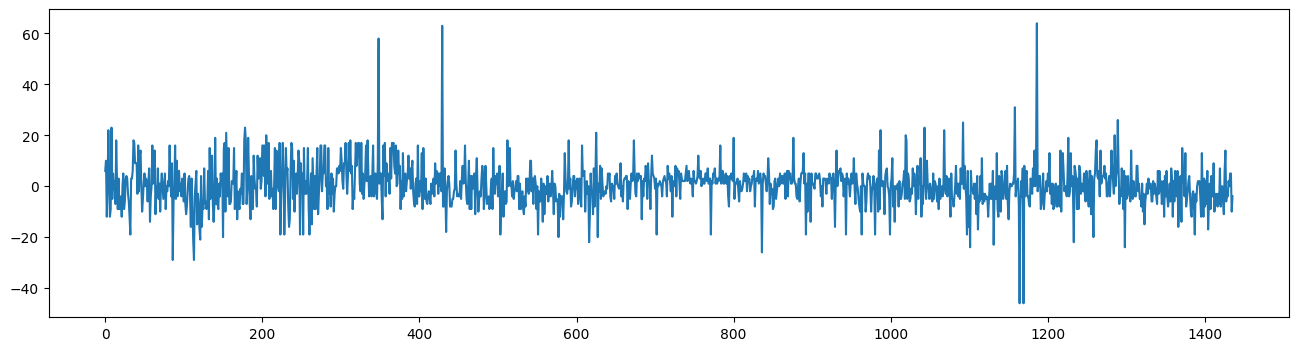

In [148]:
df['pos/neg'] = df['positive'] - df['negative']
df['pos/neg'].plot(figsize=(16,4))

In [149]:
plt.style.use('seaborn-v0_8-darkgrid')

<Axes: >

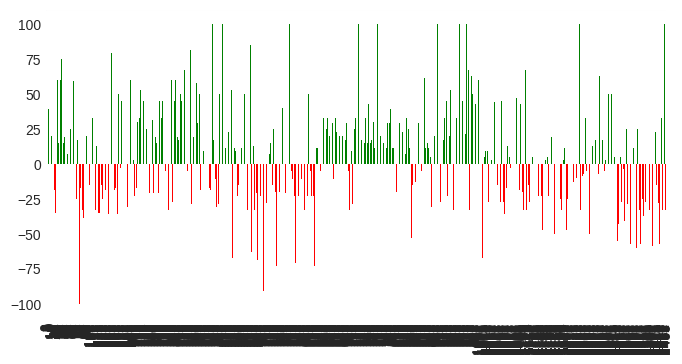

In [152]:
df['(-)αρνητικότητα | θετικότητα(+)'] = df.positive*100//df[['positive','negative']].sum(
        axis=1) - df.negative*100//df[['positive','negative']].sum(axis=1)

df['(-)αρνητικότητα | θετικότητα(+)'].plot(kind='bar',
                                                                               color=(df['(-)αρνητικότητα | θετικότητα(+)']>0
                                                                               ).map({True: 'g', False: 'r'}), figsize=(8,4))

In [170]:
df.loc[[77,152,162], ['title', 'text']]

,title,text
77,Τάσος Χαλκιάς: Πώς είναι δυνατόν να εκδηλώνεις...,Τάσος Χαλκιάς\nΕνδοοικογενειακή βία\nΈμφυλη βί...
152,Σπάρτη: «Έφυγαν» από κοντά μας…,"ΣΠΑΡΤΗ. Διαβάστε για τις κηδείες, τα σαρανταήμ..."
162,"Freddie Mercury: 187,5 εκατ. λίρες στη γυναίκα...",Η «σύζυγος» του Freddie Mercury φέρεται ότι θα...


In [171]:
import numpy as np

In [188]:
df.head(78)

,level_0,index,title,text,positivity,negativity,anger,anticipation,disgust,fear,joy,positive,surprise,trust,sadness,negative,pos/neg,(-)αρνητικότητα | θετικότητα(+)
0,0,0,Ομιλία Κουτσούμπα στη συναυλία-αφιέρωμα στο πο...,"Στη Θεσσαλονίκη, στο Θέατρο Γης, στην μεγάλη σ...",106,100,82,49,45,62,39,106,28,67,45,100,6,3.0
1,1,1,Τα διδάγματα και η προτροπή μου,Ι. Παλαμίδης*\nΚύριε διευθυντά\nΔιαβάζοντας όπ...,17,7,0,5,0,2,6,17,3,9,0,7,10,41.0
2,2,2,Ποινή φυλάκισης 12 μηνών αλλά εξαγοράσιμη στον...,Με ποινή φυλάκισης 12 μηνών εξαγοράσιμη προς 1...,23,35,28,10,15,33,2,23,5,20,15,35,-12,-21.0
3,3,3,Το Προξενιό της Ιουλίας: Ο Προβιός στο χώμα κα...,Ο Γιωργίκης Προβιός είχε το τέλος που του άξιζ...,5,5,4,3,3,5,1,5,5,1,5,5,0,0.0
4,4,4,Εκλογές στο Ιράν: Θα αλλάξουν οι σχέσεις με τι...,Ο Μασούντ Πεζεσκιάν ελπίζει να κερδίσει ένα απ...,49,27,14,16,8,17,7,49,8,34,9,27,22,29.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73,73,73,Πέννυ Μπαλτατζή: “Περάσαμε μία κρίση με τον σύ...,“Ήταν δίπλα μου όταν είχα δυσκολίες στο να μεί...,8,8,2,3,1,5,5,8,5,7,5,8,0,0.0
74,74,74,17.800 μόρια συγκέντρωσε ο Μπάμπης Αναγνωστόπο...,Ανάμεσα στους επιτυχόντες των φετινών πανελλην...,8,13,10,9,10,8,2,8,4,5,8,13,-5,-23.0
75,75,75,Νέες βαριές καταγγελίες κατά του Απόστολου Λύτ...,Η σύζυγος του Απόστολου Λύτρα ζητά την άρση το...,2,2,1,0,0,1,1,2,0,1,0,2,0,0.0
76,76,76,"Πανελλαδικές 2024: Ζευγάρι από τον Βόλο, έδωσε...",Μια υπέροχη ιστορία φέρνει στο φως το gegonota...,9,4,3,3,2,2,7,9,3,12,1,4,5,39.0


In [193]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

In [194]:
df['text']

0       Στη Θεσσαλονίκη, στο Θέατρο Γης, στην μεγάλη σ...
1       Ι. Παλαμίδης*\nΚύριε διευθυντά\nΔιαβάζοντας όπ...
2       Με ποινή φυλάκισης 12 μηνών εξαγοράσιμη προς 1...
3       Ο Γιωργίκης Προβιός είχε το τέλος που του άξιζ...
4       Ο Μασούντ Πεζεσκιάν ελπίζει να κερδίσει ένα απ...
                              ...                        
1431    Το άτυχο\nαγόρι\nείχε πάει με γκρουπ τουριστών...
1432    Τελούμε το\nΣάββατο 29 Ιουνίου 2024\nστον Ιερό...
1433    «Είμαι σε μία μεταβατική κατάσταση και θέλω να...
1434    Ανακοίνωση για την φονική συμπλοκή, με έναν νε...
1435    Οι Αρχές της Ιταλίας ερευνούν την άγρια δολοφο...
Name: text, Length: 1436, dtype: object

In [195]:

wordcloud = WordCloud(
    stopwords = nlp.Defaults.stop_words,
    width = 2000,
    height = 1000,
    background_color = 'black'
 ).generate(text)
fig = plt.figure(
    figsize = (10, 8),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

NameError: name 'text' is not defined